In [ ]:
#161805041
#UĞUR CAN KÖK
#Library : Pytorch
#Description of Project: In this project I will work on IR pictures. There are people walking and not walking on IR pictures. 
                         #I will classify them and get the accuracy value in CNN or ResNet, which algorithm works better, 
                         #which solution has been found for vanishing gradient problem, and I will focus on them.

I wanted to work on a topic related to my thesis in my project. In my thesis, I worked on the pre-trained model. In my homework, I worked on RNN. Now I am working on CNN and RNN. The basic logic in artificial neural networks is as follows: We have input values and hidden layers in between. Finally, we have an output layer. This general logic is the same in almost all deep learning models, but there are some changes from model to model. Let's look at the changes experienced on the CNN model. There is no change in input layer, hidden layer and output layer, but since we don't have a csv file, we will need to edit the input layer because we have image files in CNN. CNN passes the data through certain stages before receiving the input layer and outputs it to the input layer. If we examine these stages a little, it consists of 4 stages. Convolution, Pooling, Flattenning, Fully Connected.

**Convolutional**

When programming a CNN, the input is a tensor with shape (number of images) x (image width) x (image height) x (image depth). Then after passing through a convolutional layer, the image becomes abstracted to a feature map, with shape (number of images) x (feature map width) x (feature map height) x (feature map channels). A convolutional layer within a neural network should have the following attributes:

Convolutional kernels defined by a width and height (hyper-parameters).
The number of input channels and output channels (hyper-parameter).
The depth of the Convolution filter (the input channels) must be equal to the number channels (depth) of the input feature map.

**Pooling**

Convolutional networks may include local or global pooling layers to streamline the underlying computation. Pooling layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer.

**Flattening**

After finishing the previous two steps, we're supposed to have a pooled feature map by now. As the name of this step implies, we are literally going to flatten our pooled feature map into a column like in the image below. The reason we do this is that we're going to need to insert this data into an artificial neural network later on.

**Fully connected**

Fully connected layers connect every neuron in one layer to every neuron in another layer. It is in principle the same as the traditional multi-layer perceptron neural network (MLP). The flattened matrix goes through a fully connected layer to classify the images.

CNN is ready to be trained after going through these stages. I will show you step by step how we do all these steps in the code. If the CNN algorithm works perfectly, where did ResNet come from? As with RNN, we saw a vanishing gradient problem. We can describe the vanishing gradient problem as not learning. So how does this happen? The deep learning learns deeply on the name, but as the layers increase, the feedback value in the backpropagation shrinks almost negligibly, which does not cause a significant change in the weight assigned first, so it remains very close to the previous value and the system cannot learn. In short, a 20-layer network structure can yield much better results than 50 layers. ResNet has been used to prevent such problems. So how ResNet solves vanishing gradient problem. ResNet is establishing a connection called shortcut. Normally CNN is a little different from ResNet when it comes to conv, batch norm, relu and output order. The input from ResNet is used twice.The incoming input passes through conv, batch norm as in CNN at first, then the processed part is collected as the input is not processed and then the output returns through relu. In this way, even if there are many layers, the advantage of collecting the input in its original form protects us from the vanishing gradient problem.  In my project, I will make classification using these two algorithms and compare the results. I used google colab while developing my project.



In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
import os
print(os.stat('/content/drive/My Drive/LSIFIR.zip').st_size/1000000000) # GigaBytes (approx)

0.510897852


In [ ]:
% cd /content/

/content


In [ ]:
# unzip to train_imgs folder
Infrared = '/content/drive/My Drive/LSIFIR.zip'
import zipfile
zip_ref = zipfile.ZipFile(Infrared, 'r')
zip_ref.extractall('ImageDataset')
zip_ref.close()

In [ ]:
! ls

drive  ImageDataset  sample_data


In [ ]:
% cd /content/ImageDataset/LSIFIR

/content/ImageDataset/LSIFIR


In [ ]:
! ls

Classification	Detection


In [ ]:
#Data Preprocessing
#Import Library
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image #to read image
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [ ]:
#device confic EXTRA DEFAULT CPU but GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device", device)

Device cpu


In [ ]:
# I wrote a function to read the folder with our pictures.
def read_images(path, num_img):#I take the path to read the file, and we get num_img to know how many pictures there are.
  array = np.zeros([num_img, 64*32]) #I upload our data to this place first of all let's open for loop
  i = 0
  for img in os.listdir(path):
    img_path = path + "//" + img
    img = Image.open(img_path, mode = 'r')
    data = np.asarray(img, dtype="uint8")
    data = data.flatten() #I do the flattened picture to store it in the array.
    array[i,:] = data
    i +=1
  return array

In [ ]:
#read train set negative image
train_negative_path = r"/content/ImageDataset/LSIFIR/Classification/Train/neg"
num_train_negative_img = 43390 #I know how many images in folder from the dataset

In [ ]:
train_negative_array = read_images(train_negative_path,num_train_negative_img) #There is non-pedestrian data in the train dataset.

In [ ]:
x_train_negative_tensor = torch.from_numpy(train_negative_array[:42000,:]) #The pictures I received as input did not identify the labels
print(x_train_negative_tensor.size())

torch.Size([42000, 2048])


In [ ]:
y_train_negative_tensor = torch.zeros(42000, dtype = torch.long) #I identified the labels
print(y_train_negative_tensor.size())

torch.Size([42000])


In [ ]:
#read train set positive image
train_positive_path = r"/content/ImageDataset/LSIFIR/Classification/Train/pos"
num_train_positive_img = 10208 #I know how many images in folder from the dataset

In [ ]:
train_positive_array = read_images(train_positive_path,num_train_positive_img)

In [ ]:
x_train_positive_tensor = torch.from_numpy(train_positive_array[:10000,:]) #The pictures I received as input did not identify the labels
print(x_train_positive_tensor.size())

torch.Size([10000, 2048])


In [ ]:
y_train_positive_tensor = torch.ones(10000, dtype = torch.long) #I identified the labels
print(y_train_positive_tensor.size())

torch.Size([10000])


In [ ]:
#concat train data
x_train = torch.cat((x_train_negative_tensor,x_train_positive_tensor),0) #merging down from above, I say combine lines.
y_train = torch.cat((y_train_negative_tensor, y_train_positive_tensor),0)

In [ ]:
print(x_train.size())
print(y_train.size())

torch.Size([52000, 2048])
torch.Size([52000])


In [ ]:
#read test set negative image
test_negative_path = r"/content/ImageDataset/LSIFIR/Classification/Test/neg"
num_test_negative_img = 22050 #I know how many images in folder from the dataset

In [ ]:
test_negative_array = read_images(test_negative_path,num_test_negative_img)

In [ ]:
x_test_negative_tensor = torch.from_numpy(test_negative_array[:18056,:]) #The pictures I received as input did not identify the labels
print(x_test_negative_tensor.size())

torch.Size([18056, 2048])


In [ ]:
y_test_negative_tensor = torch.zeros(18056, dtype = torch.long) #I identified the labels
print(y_test_negative_tensor.size())

torch.Size([18056])


In [ ]:
#read test set positive image
test_positive_path = r"/content/ImageDataset/LSIFIR/Classification/Test/pos"
num_test_positive_img = 5944 #I know how many images in folder from the dataset

In [ ]:
test_positive_array = read_images(test_positive_path,num_test_positive_img)

In [ ]:
x_test_positive_tensor = torch.from_numpy(test_positive_array) #The pictures I received as input did not identify the labels
print(x_test_positive_tensor.size())

torch.Size([5944, 2048])


In [ ]:
y_test_positive_tensor = torch.zeros(num_test_positive_img, dtype = torch.long) #I identified the labels
print(y_test_positive_tensor.size())

torch.Size([5944])


In [ ]:
#concat test data
x_test = torch.cat((x_test_negative_tensor,x_test_positive_tensor),0) 
y_test = torch.cat((y_test_negative_tensor, y_test_positive_tensor),0)

In [ ]:
print(x_test.size())
print(y_test.size())

torch.Size([24000, 2048])
torch.Size([24000])


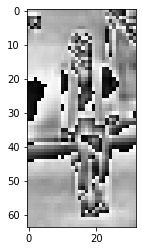

In [ ]:
#visualize the dataset
plt.imshow(x_train[45000,:].reshape(64,32),cmap="gray")

In [ ]:
#I started develop the CNN model
#hyperparameters : A hyper-parameter is a constant parameter whose value is set before the learning process begins. 
num_epochs = 50
num_classes = 2
batch_size = 64
learning_rate = 0.00001 #The learning rate defines the size of the corrective steps

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    self.conv1 = nn.Conv2d(1,10,5) #1 input, 10 output channel, 5 kernel size
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(10,16,5)
    self.neurons = self.linear_input_neurons()

    self.fc1 = nn.Linear(self.linear_input_neurons(),520)
    self.fc2 = nn.Linear(520,130)
    self.fc3 = nn.Linear(130,num_classes)

  def forward(self,x):
    x = self.pool(F.relu((self.conv1(x))))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(x.size(0),-1) #flatten in pytorch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


  def size_after_relu(self, x): #I have to do that because I got an error which is called mismatch.
    x = self.pool(F.relu(self.conv1(x.float())))
    x = self.pool(F.relu(self.conv2(x.float())))
        
    return x.size()
    
  def linear_input_neurons(self):
    size = self.size_after_relu(torch.rand(1, 1, 64, 32))
    m = 1
    for i in size:
      m *= i

    return int(m)

In [ ]:
#Create tensor data for train data
train = torch.utils.data.TensorDataset(x_train,y_train)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)

In [ ]:
#Create tensor data for test data
test = torch.utils.data.TensorDataset(x_test,y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [ ]:
model = Net().to(device) #for using GPU

In [ ]:
#Loss and optimizer
criterion = nn.CrossEntropyLoss()

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.8)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0.8
    nesterov: False
    weight_decay: 0
)

In [ ]:
#Train a network
#I defined that because when I train the my dataset I will add the accuracy and loss value to the array nad then I will use it for visualizing.
start = time.time()
train_acc = []
test_acc = []
loss_list = []
iterations = []
use_gpu = True

In [ ]:
for epoch in range(num_epochs+1):
    for i, data in enumerate(trainloader):
        
        images, labels = data
        images = images.view(images.size(0), 1, 64, 32) #reshaping
        images = images.float()
        
        # usign gpu
        images, labels = images.to(device), labels.to(device)
        
        #forward
        outputs = model(images)

        #loss
        loss = criterion(outputs, labels)

        #zero gradient
        optimizer.zero_grad()

        #backprogation
        loss.backward()

        #update weights
        optimizer.step()
        
        
    # test set
    correct = 0
    total = 0
    with torch.no_grad(): #closing the backprogation
        for data in testloader:
            images, labels = data
            images = images.view(images.size(0), 1, 64, 32)
            images = images.float()
        
            images, labels_test = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels_test.size(0)
            correct += (predicted == labels_test).sum().item()
    
    accuracy1 = correct / total

    
    # train set 
    correct = 0
    total = 0
    with torch.no_grad(): #closing the backprogation
        for data in trainloader:
            images, labels = data
            images = images.view(images.size(0), 1, 64, 32)
            images = images.float()
        
            images, labels_train = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels_train.size(0)
            correct += (predicted == labels_train).sum().item()
    
    accuracy2 = correct / total
    
    #add information to our array
    loss_list.append(loss.item())
    train_acc.append(accuracy2)
    test_acc.append(accuracy1)
    iterations.append(epoch)
        
    print('epoch: {}   -->  train accuracy = {:.5f},\ttest accuracy = {:.5f},\tloss = {:.5f}'.format(epoch, accuracy2, accuracy1, loss.item()))
    

print('Finished.')


epoch: 0   -->  train accuracy = 0.90517,	test accuracy = 0.89654,	loss = 0.21261
epoch: 1   -->  train accuracy = 0.92269,	test accuracy = 0.85308,	loss = 0.12625
epoch: 2   -->  train accuracy = 0.93088,	test accuracy = 0.88971,	loss = 0.30997
epoch: 3   -->  train accuracy = 0.93744,	test accuracy = 0.87596,	loss = 0.16877
epoch: 4   -->  train accuracy = 0.94063,	test accuracy = 0.83871,	loss = 0.10300
epoch: 5   -->  train accuracy = 0.94571,	test accuracy = 0.86829,	loss = 0.19677
epoch: 6   -->  train accuracy = 0.94906,	test accuracy = 0.86175,	loss = 0.20845
epoch: 7   -->  train accuracy = 0.95123,	test accuracy = 0.85533,	loss = 0.10880
epoch: 8   -->  train accuracy = 0.95356,	test accuracy = 0.86433,	loss = 0.27417
epoch: 9   -->  train accuracy = 0.95296,	test accuracy = 0.88425,	loss = 0.21797
epoch: 10   -->  train accuracy = 0.95735,	test accuracy = 0.85646,	loss = 0.06548
epoch: 11   -->  train accuracy = 0.95527,	test accuracy = 0.88687,	loss = 0.02466
epoch: 12   --

In [ ]:
#I show you how long it takes to work
end = time.time()
process_time = (end - start)/60
print("Process Time", process_time)

Process Time 56.904849314689635


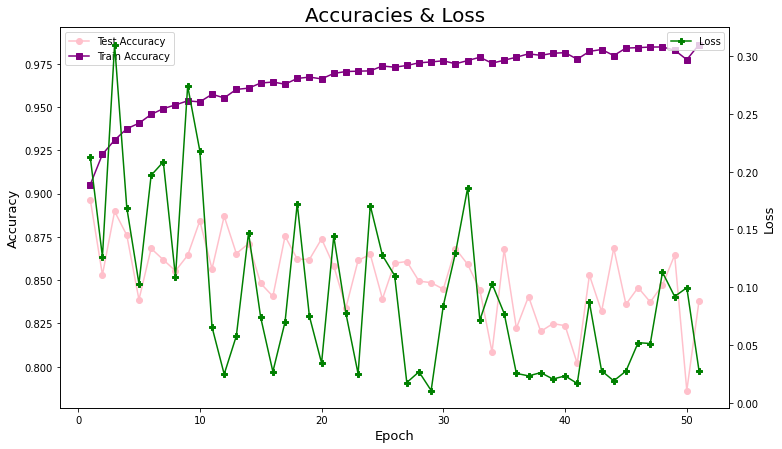

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,7))

ax1.plot(np.array(iterations)+1, test_acc, label='Test Accuracy', marker='o', color='pink')
ax1.plot(np.array(iterations)+1, train_acc, label='Train Accuracy', marker='s', color='purple')
ax1.set_xlabel('Epoch', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13)
plt.legend()

ax2 = ax1.twinx()
ax2.plot(np.array(iterations)+1, loss_list, label='Loss', marker='P', color='green')
ax2.set_ylabel('Loss', fontsize=13)
plt.legend()
plt.title('Accuracies & Loss', fontsize=20)
plt.show()

In [ ]:
#I start the RESNET part
def conv3x3(in_planes, out_planes, stride = 1): #When doing convolution, stride = 1 means 1 offset. If stride = 2, it would shift 2. 
  return nn.Conv2d(in_planes, out_planes, kernel_size = 3, stride= stride, padding = 1, bias = False)# When we add a filter, the matrix that is 4x4 changes it to you. To prevent this, we add padding. We prevent it from losing information at low level. BatchNorm is going to make no need for bias

def conv1x1(in_planes, out_planes, stride = 1):
  return nn.Conv2d(in_planes, out_planes, kernel_size = 1, stride= stride, bias = False)

In [ ]:
class BasicBlock(nn.Module):
  expansion = 1
  def __init__(self, inplanes, planes, stride = 1, downsample = None):
    super(BasicBlock,self).__init__()
    self.conv3 = conv3x3(inplanes, planes, stride)
    self.bn1 = nn.BatchNorm2d(planes) #batchNorm normalizes each block.
    self.relu = nn.ReLU(inplace = True) #After calling relu activation it means sync the result to yourself.
    self.drop = nn.Dropout(0.9)
    self.conv4 = conv3x3(planes, planes)
    self.bn2 = nn.BatchNorm2d(planes)
    self.downsample = downsample
    self.stride = stride
  
  def forward(self, x):
    identity = x

    out = self.conv3(x)
    out = self.bn1(out)
    out = self.relu(out)
    out = self.drop(out)
    out = self.conv4(out)
    out = self.bn2(out)
    out = self.drop(out)

    #What were I doing on resNet? On the one hand, while the convolution batch continued, 
    #I were collecting the input and inserting it into relu. I am doing this against the vanishing gradient problem. 
    #The reason for writing the condition here is that we collect input and convolution input, 
    #or the matrix dimensions must be the same, so let's add. We do this with downsample.
    if self.downsample is not None:
      identity = self.downsample(x)

    out = out + identity
    out = self.relu(out)
    return out

In [ ]:
class ResNet(nn.Module):

  def __init__(self, block, layers, num_classes = num_classes):
    super(ResNet,self).__init__()
    self.inplanes = 64
    self.conv3 = nn.Conv2d(1,64, kernel_size = 7, stride = 2, padding = 3, bias = False)
    self.bn1 = nn.BatchNorm2d(64)
    self.relu = nn.ReLU(inplace = True)
    self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
    self.layer1 = self._make_layer(block, 64, layers[0], stride = 1)
    self.layer2 = self._make_layer(block, 128, layers[1], stride = 2)
    self.layer3 = self._make_layer(block, 256, layers[2], stride = 2)

    self.avgpool = nn.AdaptiveAvgPool2d((1,1)) #I give the output, I say no matter how you choose the filter.
    self.fc4 = nn.Linear(256*block.expansion, num_classes)

    for m in self.modules():
      if isinstance(m,nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode = "fan_out", nonlinearity = "relu")
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

  #The goal of the make layer is to create a block. combining basic blocks to create a new block. The most important part for ResNet
  def _make_layer(self, block, planes, blocks, stride = 1):
    downsample = None
    if stride != 1 or self.inplanes != planes*block.expansion: #I mean I will have 1 blog expanded
      downsample = nn.Sequential(
          conv1x1(self.inplanes, planes*block.expansion, stride),
          nn.BatchNorm2d(planes*block.expansion)
      )

    layers = []
    layers.append(block(self.inplanes, planes, stride, downsample))
    self.inplanes = planes*block.expansion

    for _ in range(1, blocks):
      layers.append(block(self.inplanes, planes))
      
    return torch.nn.Sequential(*layers)

  def forward(self, x):
    x = self.conv3(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)
    x = self.layer1(x)
    x = self.layer2(x) 
    x = self.layer3(x)
    x = self.avgpool(x)
    x = x.view(x.size(0), -1)
    x = self.fc4(x)
    return x

In [ ]:
model = ResNet(BasicBlock, [2,2,2])

In [ ]:
#Loss Function and Optimizer
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#Train a network
#I defined that because when I train the my dataset I will add the accuracy and loss value to the array nad then I will use it for visualizing.
start = time.time()
train_acc1 = []
test_acc1 = []
loss_list1 = []
iterations1 = []
use_gpu = True

In [ ]:
for epoch in range(num_epochs+1):
    for i, data in enumerate(trainloader):
        
        images, labels = data
        images = images.view(images.size(0), 1, 64, 32) #reshaping
        images = images.float()
        
        # using gpu
        images, labels = images.to(device), labels.to(device)
        
        #forward
        outputs = model(images)

        #loss
        loss = criterion(outputs, labels)

        #zero gradient
        optimizer.zero_grad()

        #backprogation
        loss.backward()

        #update weights
        optimizer.step()
        
        
    # test set
    correct = 0
    total = 0
    with torch.no_grad(): #closing the backprogation
        for data in testloader:
            images, labels = data
            images = images.view(images.size(0), 1, 64, 32)
            images = images.float()
        
            images, labels_test = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels_test.size(0)
            correct += (predicted == labels_test).sum().item()
    
    accuracy1 = correct / total

    
    # train set 
    correct = 0
    total = 0
    with torch.no_grad(): #closing the backprogation
        for data in trainloader:
            images, labels = data
            images = images.view(images.size(0), 1, 64, 32)
            images = images.float()
        
            images, labels_train = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels_train.size(0)
            correct += (predicted == labels_train).sum().item()
    
    accuracy2 = correct / total
    
    #add information to our array
    loss_list1.append(loss.item())
    train_acc1.append(accuracy2)
    test_acc1.append(accuracy1)
    iterations1.append(epoch)
        
    print('epoch: {}   -->  train accuracy = {:.5f},\ttest accuracy = {:.5f},\tloss = {:.5f}'.format(epoch, accuracy2, accuracy1, loss.item()))
    

print('Finished.')


epoch: 0   -->  train accuracy = 0.79598,	test accuracy = 0.98121,	loss = 0.54015
epoch: 1   -->  train accuracy = 0.80240,	test accuracy = 0.98346,	loss = 0.56956
epoch: 2   -->  train accuracy = 0.80281,	test accuracy = 0.97429,	loss = 0.49311
epoch: 3   -->  train accuracy = 0.80763,	test accuracy = 0.96100,	loss = 0.21546
epoch: 4   -->  train accuracy = 0.82013,	test accuracy = 0.94437,	loss = 0.23817
epoch: 5   -->  train accuracy = 0.83329,	test accuracy = 0.94225,	loss = 0.25087
epoch: 6   -->  train accuracy = 0.84356,	test accuracy = 0.93358,	loss = 0.30571
epoch: 7   -->  train accuracy = 0.85335,	test accuracy = 0.93088,	loss = 0.13441
epoch: 8   -->  train accuracy = 0.86377,	test accuracy = 0.92104,	loss = 0.26223
epoch: 9   -->  train accuracy = 0.86988,	test accuracy = 0.92179,	loss = 0.19193
epoch: 10   -->  train accuracy = 0.87673,	test accuracy = 0.91854,	loss = 0.25095
epoch: 11   -->  train accuracy = 0.88373,	test accuracy = 0.91946,	loss = 0.26508
epoch: 12   --

In [ ]:
end = time.time()
process_time = (end - start)/60
print("Process Time", process_time)

Process Time 514.0017169157665


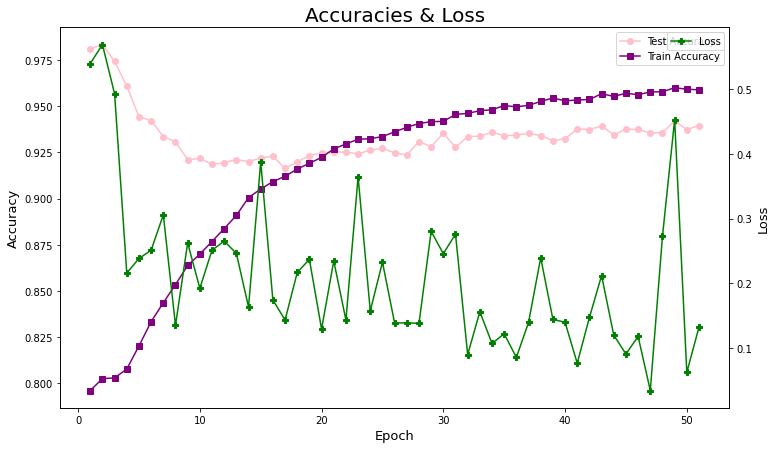

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,7))

ax1.plot(np.array(iterations1)+1, test_acc1, label='Test Accuracy', marker='o', color='pink')
ax1.plot(np.array(iterations1)+1, train_acc1, label='Train Accuracy', marker='s', color='purple')
ax1.set_xlabel('Epoch', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13)
plt.legend()

ax2 = ax1.twinx()
ax2.plot(np.array(iterations1)+1, loss_list1, label='Loss', marker='P', color='green')
ax2.set_ylabel('Loss', fontsize=13)
plt.legend()
plt.title('Accuracies & Loss', fontsize=20)
plt.show()

In conclusion, my aim in this project was to compare the two models with the same epoch number, batch size and learning rate, both in terms of runtime and in terms of test and train accuracy, to decide which algorithm we should choose when we encounter a problem in the future. I think I did that too. As a result of 50 iterations in CNN, train accuracy was 0.98606, test accuracy was 0.83783, loss value was 0.02781. There are two important problems that we will encounter in deep learning. The first is undefitting, the other is overfitting. Underfitting can be translated as less training and overfitting as memorization. We have trained our data, we looked at train accuracy, it was high, but we can not say immediately that we found the right result. We have to look at the test accuracye to see if there is overfitting. If train accuracy is high, test accuracy is low, we understand that overfitting has occurred. In this case, by changing the hyperparameters, that is, changing the concepts such as epoch number, batch size, retraining the model and following the results, the best hyperparameter numbers are decided. When looking at the CNN model results, the train accuracy value is very good, the test accuracy value is also very good, so there is no overfitting. Anyway, what I want to do in this project is, of course, to avoid concepts such as overfitting underfitting, but as I said, my main goal is to give better results based on the same hyperparameters based on several criteria. As I mentioned at the beginning of the project, my other purpose is to avoid the vanishing gradient problem. If we look at the result I got in ResNet after 50 iterations, train accuracy was 0.95894, test accuracy was 0.93958, loss value was 0.13173. When we compare the two algorithms, CNN and ResNet, ResNet gave us a much higher accuracy result. However, when working times are compared, we see that ResNet worked much slower than CNN. In terms of time, ResNet is disadvantageous but fine in terms of accuracy. Meanwhile, since the ResNette train and test accuracy values were high, that is, close and high values, there was no overfitting situation. In general, we had pictures of IR value. We made classification on these pictures, so whether IR walked or not walked in IR pictures, we classified it.According to our results, ResNet gave a much higher accuracy value than CNN without vanishing gradient problems.
